In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
#import tensorflow_datasets as tfds

tfkl = tfk.layers

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
data_batch1 = unpickle('data_batch_1')
data1 = data_batch1[list(data_batch1.keys())[2]]

data_batch2 = unpickle('data_batch_2')
data2 = data_batch2[list(data_batch2.keys())[2]]
data_batch3 = unpickle('data_batch_3')
data3 = data_batch3[list(data_batch3.keys())[2]]
data_batch4 = unpickle('data_batch_4')
data4 = data_batch4[list(data_batch4.keys())[2]]
data_batch5 = unpickle('data_batch_5')
data5 = data_batch5[list(data_batch5.keys())[2]]

test_batch = unpickle('test_batch')
test = test_batch[list(test_batch.keys())[2]]
test_labels5 =  test_batch[list(test_batch .keys())[1]]
data = np.array([*data1, *data2, *data3, *data4, *data5])

In [6]:
labels1 =  data_batch1[list(data_batch1.keys())[1]]
labels2 =  data_batch2[list(data_batch2.keys())[1]]
labels3 =  data_batch3[list(data_batch3.keys())[1]]
labels4 =  data_batch4[list(data_batch4.keys())[1]]
labels5 =  data_batch5[list(data_batch5.keys())[1]]
labels = np.array([*labels1, *labels2, *labels3, *labels4, *labels4])

In [7]:
images = data
images = images/255.0
images = images[:, :, np.newaxis]
images = np.reshape(images, (len(images), 32, 32, 3))
labels = tf.one_hot(labels.astype(np.int32), depth = 10)

In [8]:
model = tfk.Sequential()
# block1
model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(32, 32, 3)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))


# block2
model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

# block3
model.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

# flatten
model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(10, activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 16)          2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 8)           5

In [9]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

#results = model.fit(images, labels,steps_per_epoch=20, epochs=20, validation_data=x_test)
results = model.fit(images, labels, steps_per_epoch=20,batch_size = 35,  epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 11ms/step - loss: 2.3203
Epoch 2/5
20/20 [==============================] - 0s 11ms/step - loss: 2.3081
Epoch 3/5
20/20 [==============================] - 0s 11ms/step - loss: 2.3007
Epoch 4/5
20/20 [==============================] - 0s 11ms/step - loss: 2.3021
Epoch 5/5
20/20 [==============================] - 0s 11ms/step - loss: 2.3074


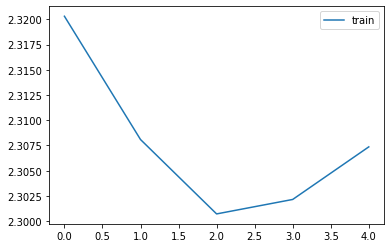

In [10]:
plt.plot(results.history["loss"])
#plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

In [12]:

test = test/255.0
test = test[:, :, np.newaxis]
test = np.reshape(test, (len(test), 32, 32, 3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'Probability')

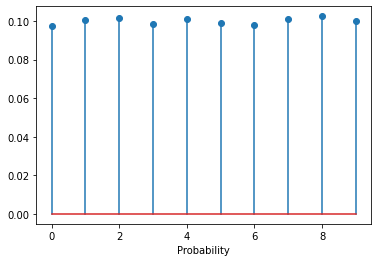

In [13]:

plt.stem(model.predict(test)[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")